<a href="https://colab.research.google.com/github/Herpakka/tagoline/blob/main/lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


between class variance :0.16068825571757278
between class variance :2.88457872149141
between class variance :0.07425800838196475


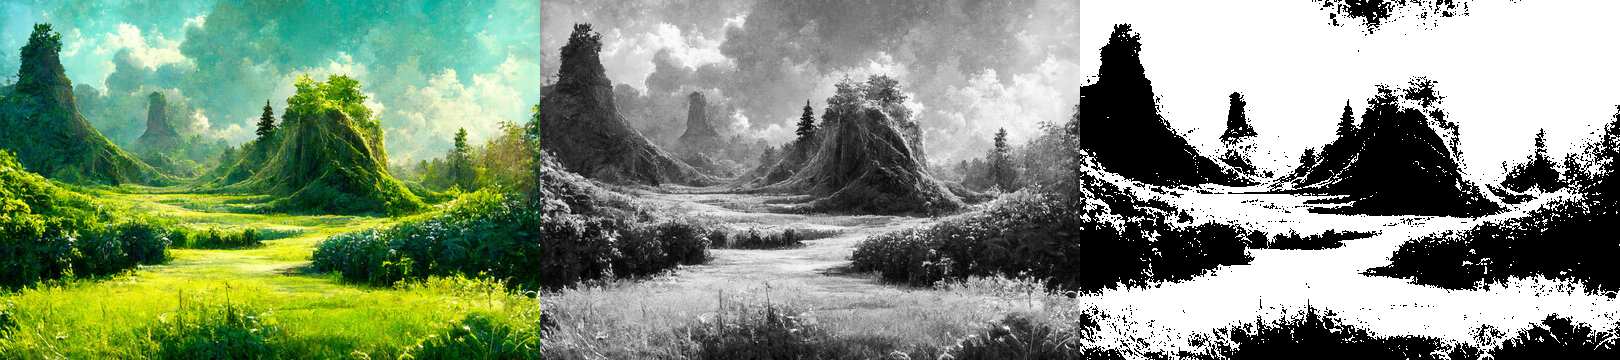

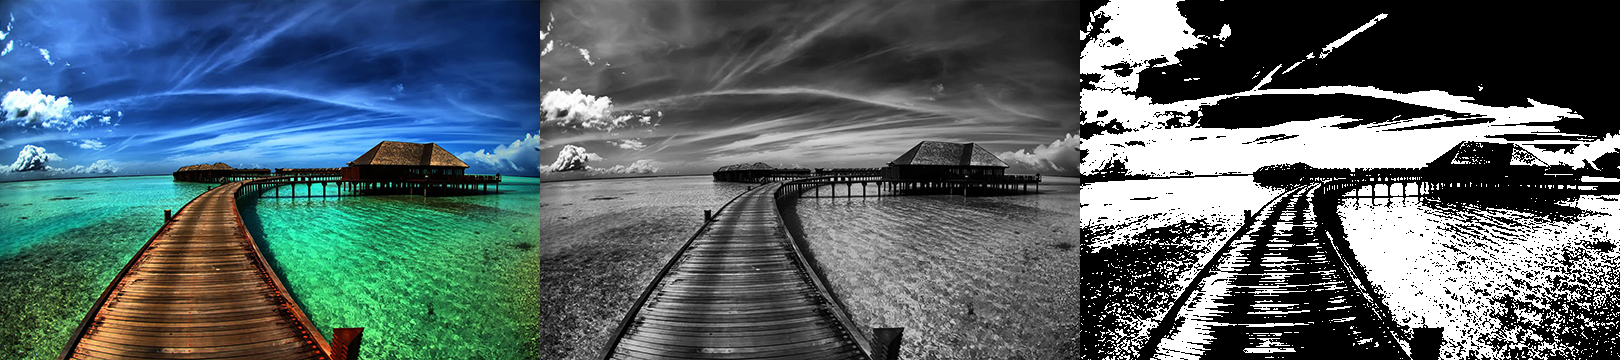

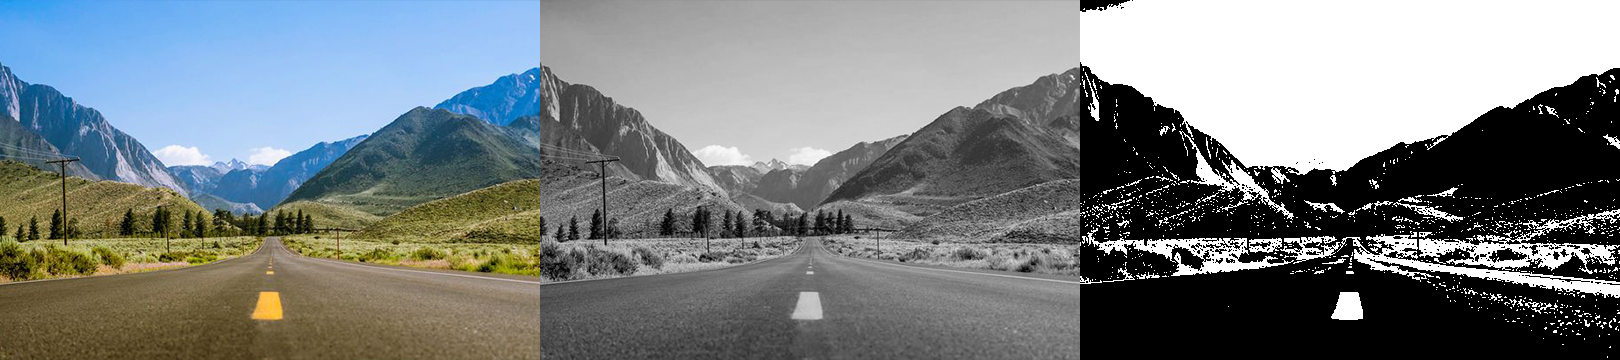

In [ ]:
import math
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image
from google.colab.patches import cv2_imshow

# เอาแกน x y ออก
def prop():
    plt.axis('off')
    plt.tight_layout()

# ขาวดำ
def grayscale(image):
    image = image.astype(np.uint8)

    blue_channel = image[:, :, 0]
    green_channel = image[:, :, 1]
    red_channel = image[:, :, 2]

    grayscale_image = 0.299 * red_channel + 0.587 * green_channel + 0.114 * blue_channel
    grayscale_image = grayscale_image.astype(np.uint8)

    return grayscale_image

#เก็บ pixel เป็นแถวกะคอลัมน์
def calculate_histogram(img):
    row, col = img.shape
    histogram = np.zeros(256)
    for i in range(row):
        for j in range(col):
            histogram[img[i, j]] += 1
    return histogram

# otsu theshold
def otsu_threshold(histogram):
    total_pixels = np.sum(histogram)
    sum_intensity = np.sum(np.arange(256) * histogram)

    var_max = 0
    threshold = 0

    sum_back = 0
    w_back = 0

    for t in range(256):
        w_fore = total_pixels - w_back
        if w_back > 0 and w_fore > 0:
            mean_back = sum_back / w_back
            mean_fore = (sum_intensity - sum_back) / w_fore

            var_between = w_back * w_fore * ((mean_back - mean_fore) / total_pixels) ** 2

            if var_between > var_max:
                var_max = var_between
                threshold = t

        w_back += histogram[t]
        sum_back += t * histogram[t]

    print('between class variance :' + str(var_between))

    return threshold

# เปลี่ยนขาวดำเป็น otsu theshold
def apply_otsu_threshold(img):
    histogram = calculate_histogram(img)
    threshold = otsu_threshold(histogram)
    return (img >= threshold) * 255

# เรียกรูป
image1 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/vision lab2/color2_1.jpg')
image2 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/vision lab2/color2_2.jpg')
image3 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/vision lab2/color2_3.jpg')


# เช็คว่ารูปโหลดหรือยัง
if image1 is None or image2 is None or image3 is None:
    print("Error: Could not load one or more images.")
else:
    # เปลี่ยนสีเป็นขาวดำ
    grayscale1 = grayscale(image1)
    grayscale2 = grayscale(image2)
    grayscale3 = grayscale(image3)

    # เปลี่ยนขาวดำเป็นภาพ 3 สีเพื่อที่จะแสดงแถวเดียวกันได้
    b_grayscale1 = cv2.cvtColor(grayscale1, cv2.COLOR_GRAY2BGR)
    b_grayscale2 = cv2.cvtColor(grayscale2, cv2.COLOR_GRAY2BGR)
    b_grayscale3 = cv2.cvtColor(grayscale3, cv2.COLOR_GRAY2BGR)

    # เปลี่ยนขาวดำเป็น otsu theshold
    binary_image1 = apply_otsu_threshold(grayscale1)
    binary_image2 = apply_otsu_threshold(grayscale2)
    binary_image3 = apply_otsu_threshold(grayscale3)

    # เปลี่ยน otsu theshold เป็นภาพ 3 สีเพื่อที่จะแสดงแถวเดียวกันได้
    o1 = cv2.merge((binary_image1,binary_image1,binary_image1))
    o2 = cv2.merge((binary_image2,binary_image2,binary_image2))
    o3 = cv2.merge((binary_image3,binary_image3,binary_image3))

    # เอาภาพสี ขาวดำ otsu theshold มาเรียงกัน
    h1 = np.concatenate((image1, b_grayscale1, o1), axis=1)
    h2 = np.concatenate((image2, b_grayscale2, o2), axis=1)
    h3 = np.concatenate((image3, b_grayscale3, o3), axis=1)

    # แสดงภาพ
    cv2_imshow(h1)
    cv2_imshow(h2)
    cv2_imshow(h3)



In [ ]:
import math
import numpy as np
import cv2
from matplotlib import pyplot as plt
from PIL import Image
from google.colab.patches import cv2_imshow

def grayscale(image):
    image = image.astype(np.uint8)

    blue_channel = image[:, :, 0]
    green_channel = image[:, :, 1]
    red_channel = image[:, :, 2]

    grayscale_image = 0.299 * red_channel + 0.587 * green_channel + 0.114 * blue_channel
    grayscale_image = grayscale_image.astype(np.uint8)

    return grayscale_image


def calculate_histogram(img):
    row, col = img.shape
    histogram = np.zeros(256)
    for i in range(row):
        for j in range(col):
            histogram[img[i, j]] += 1
    return histogram

def otsu_threshold(histogram):
    total_pixels = np.sum(histogram)
    sum_intensity = np.sum(np.arange(256) * histogram)

    var_max = 0
    threshold = 0

    sum_back = 0
    w_back = 0

    for t in range(256):
        w_fore = total_pixels - w_back
        if w_back > 0 and w_fore > 0:
            mean_back = sum_back / w_back
            mean_fore = (sum_intensity - sum_back) / w_fore

            var_between = w_back * w_fore * ((mean_back - mean_fore) / total_pixels) ** 2

            if var_between > var_max:
                var_max = var_between
                threshold = t

        w_back += histogram[t]
        sum_back += t * histogram[t]

    print('between class variance :' + str(var_between))

    return threshold

def apply_otsu_threshold(img):
    histogram = calculate_histogram(img)
    threshold = otsu_threshold(histogram)
    return (img >= threshold) * 255

image = Image.open("/content/drive/MyDrive/Colab Notebooks/vision lab2/gray2_2.jpg").convert("L")
img = np.asarray(image)

gray_img = grayscale(image)
binary_image = apply_otsu_threshold(img)

# Display original and binary images using OpenCV
cv2_imshow(img)
cv2_imshow(binary_image.astype(np.uint8))



IndexError: ignored